/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 30, 128)             │          76,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_4 (RepeatVector)       │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 30, 21)              │           2,709 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,757 (1018.58 KB)

 Trainable params: 260,757 (1018.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.0409 - val_loss: 0.0050
Epoch 2/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 3/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 4/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 5/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0041 - val_loss: 0.0047
644/644 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Anomaly threshold for LSTM: 0.008299261143196957
   Reconstruction_Error  LSTM_Anomalies  DBSCAN_Anomalies  \
0              0.002684           False             False   
1              0.002590           False             False   
2              0.002553           False             False   
3              0.002543           False             False   
4              0.002704           False             False   

   OneClassSVM_Anomalies  IsolationForest_Anomalies  
0                

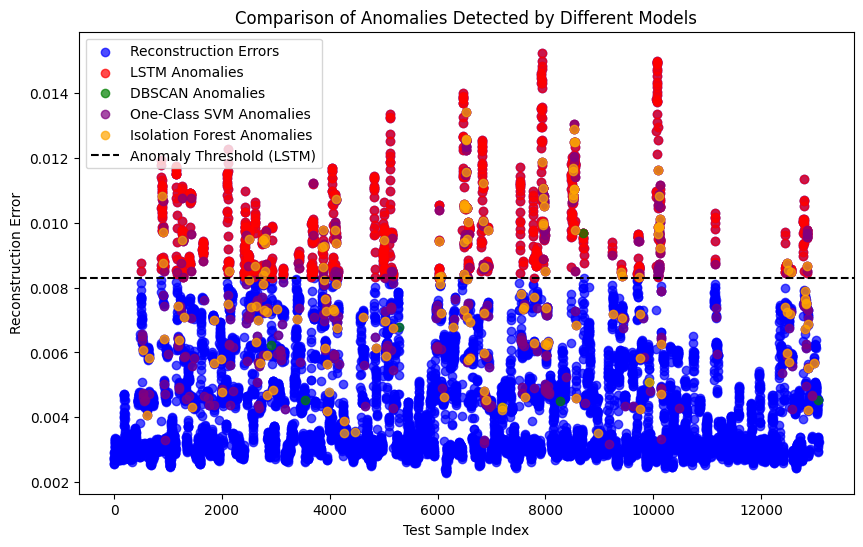

LSTM Model Metrics:
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
--------------------------------------------------------
DBSCAN Model Metrics:
Precision: 0.125
Recall: 0.0008460236886632825
F1-Score: 0.001680672268907563
ROC-AUC: 0.5001285229928383
--------------------------------------------------------
One-Class SVM Model Metrics:
Precision: 0.4018867924528302
Recall: 0.1802030456852792
F1-Score: 0.24883177570093457
ROC-AUC: 0.5767653848535778
--------------------------------------------------------
Isolation Forest Model Metrics:
Precision: 0.4294117647058823
Recall: 0.06175972927241963
F1-Score: 0.10798816568047337
ROC-AUC: 0.5267990905512288
--------------------------------------------------------
Number of anomalies detected by LSTM: 1182
Number of anomalies detected by DBSCAN: 8
Number of anomalies detected by One-Class SVM: 530
Number of anomalies detected by Isolation Forest: 170
--------------------------------------------------------


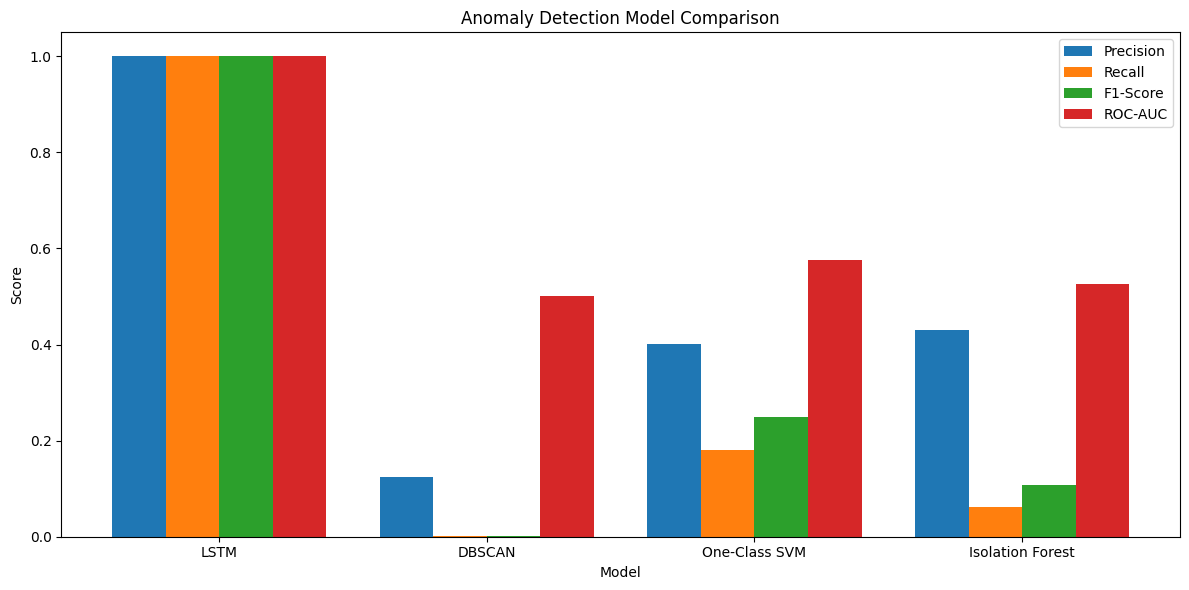

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Load the data
train_data = pd.read_csv('/kaggle/input/anamoly/train_FD001.txt', delim_whitespace=True, header=None)
test_data = pd.read_csv('/kaggle/input/anamoly/test_FD001.txt', delim_whitespace=True, header=None)
rul_data = pd.read_csv('/kaggle/input/anamoly/RUL_FD001.txt', delim_whitespace=True, header=None)

# Assign column names based on dataset description
train_columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]
test_columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]
train_data.columns = train_columns
test_data.columns = test_columns
rul_data.columns = ['RUL']

# Preprocessing the data: Scaling the sensor measurements
sensor_columns = [col for col in train_columns if 'sensor_measurement' in col]
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[sensor_columns])
test_scaled = scaler.transform(test_data[sensor_columns])

# Reshape data for LSTM: We need to format it as [samples, time_steps, features]
time_steps = 30  # Define the time window for LSTM
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps + 1):
        sequences.append(data[i:i+time_steps])
    return np.array(sequences)

train_sequences = create_sequences(train_scaled, time_steps)
test_sequences = create_sequences(test_scaled, time_steps)

# Split data into features and labels (for training)
X_train = train_sequences
X_test = test_sequences

# Build the LSTM Autoencoder model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(time_steps),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

# Train the LSTM Autoencoder
history = model.fit(X_train, X_train, epochs=5, batch_size=64, validation_data=(X_test, X_test))

# Calculate reconstruction errors
train_reconstructions = model.predict(X_train)
test_reconstructions = model.predict(X_test)

train_errors = np.mean(np.square(train_reconstructions - X_train), axis=(1, 2))
test_errors = np.mean(np.square(test_reconstructions - X_test), axis=(1, 2))

# Define anomaly detection threshold
threshold = np.percentile(train_errors, 95)
print(f"Anomaly threshold for LSTM: {threshold}")

# Identify anomalies for LSTM
lstm_anomalies = test_errors > threshold

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_anomalies = dbscan.fit_predict(test_scaled)
dbscan_anomalies = dbscan_anomalies == -1  # DBSCAN labels outliers as -1

# --- One-Class SVM ---
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
ocsvm.fit(train_scaled)
ocsvm_anomalies = ocsvm.predict(test_scaled)
ocsvm_anomalies = ocsvm_anomalies == -1

# --- Isolation Forest ---
iforest = IsolationForest(contamination=0.05, random_state=42)
iforest.fit(train_scaled)
iforest_anomalies = iforest.predict(test_scaled)
iforest_anomalies = iforest_anomalies == -1

# Ensure that all anomaly detection arrays have the same length as test_errors
test_errors_length = len(test_errors)

# Trim or pad the anomaly arrays to match the length of test_errors
lstm_anomalies = lstm_anomalies[:test_errors_length]
dbscan_anomalies = dbscan_anomalies[:test_errors_length]
ocsvm_anomalies = ocsvm_anomalies[:test_errors_length]
iforest_anomalies = iforest_anomalies[:test_errors_length]

# --- Compare Anomaly Detection Results ---
# Create a DataFrame for comparison
anomaly_comparison = pd.DataFrame({
    'Reconstruction_Error': test_errors,
    'LSTM_Anomalies': lstm_anomalies,
    'DBSCAN_Anomalies': dbscan_anomalies,
    'OneClassSVM_Anomalies': ocsvm_anomalies,
    'IsolationForest_Anomalies': iforest_anomalies
})

# Show the first few rows of anomaly comparison
print(anomaly_comparison.head())

# --- Visualization of Anomaly Comparison ---
# 1. Plot reconstruction errors with detected anomalies
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_errors)), test_errors, label='Reconstruction Errors', color='blue', alpha=0.7)
plt.scatter(np.where(lstm_anomalies)[0], test_errors[lstm_anomalies], color='red', label='LSTM Anomalies', alpha=0.7)
plt.scatter(np.where(dbscan_anomalies)[0], test_errors[dbscan_anomalies], color='green', label='DBSCAN Anomalies', alpha=0.7)
plt.scatter(np.where(ocsvm_anomalies)[0], test_errors[ocsvm_anomalies], color='purple', label='One-Class SVM Anomalies', alpha=0.7)
plt.scatter(np.where(iforest_anomalies)[0], test_errors[iforest_anomalies], color='orange', label='Isolation Forest Anomalies', alpha=0.7)
plt.axhline(y=threshold, color='black', linestyle='--', label='Anomaly Threshold (LSTM)')
plt.xlabel('Test Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Comparison of Anomalies Detected by Different Models')
plt.legend()
plt.show()

# --- Metrics Calculation ---
# Since we don't have true labels, we use the extreme values of reconstruction errors from LSTM as "true" anomalies
# Assuming that high reconstruction errors from LSTM are anomalies
true_anomalies = lstm_anomalies

def compute_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    roc_auc = roc_auc_score(true_labels, predicted_labels)
    return precision, recall, f1, roc_auc

# Metrics for LSTM Anomalies
print("LSTM Model Metrics:")
lstm_metrics = compute_metrics(true_anomalies, lstm_anomalies)
print(f"Precision: {lstm_metrics[0]}")
print(f"Recall: {lstm_metrics[1]}")
print(f"F1-Score: {lstm_metrics[2]}")
print(f"ROC-AUC: {lstm_metrics[3]}")

print("--------------------------------------------------------")
# Metrics for DBSCAN
print("DBSCAN Model Metrics:")
dbscan_metrics = compute_metrics(true_anomalies, dbscan_anomalies)
print(f"Precision: {dbscan_metrics[0]}")
print(f"Recall: {dbscan_metrics[1]}")
print(f"F1-Score: {dbscan_metrics[2]}")
print(f"ROC-AUC: {dbscan_metrics[3]}")

print("--------------------------------------------------------")

# Metrics for One-Class SVM
print("One-Class SVM Model Metrics:")
ocsvm_metrics = compute_metrics(true_anomalies, ocsvm_anomalies)
print(f"Precision: {ocsvm_metrics[0]}")
print(f"Recall: {ocsvm_metrics[1]}")
print(f"F1-Score: {ocsvm_metrics[2]}")
print(f"ROC-AUC: {ocsvm_metrics[3]}")

print("--------------------------------------------------------")

# Metrics for Isolation Forest
print("Isolation Forest Model Metrics:")
iforest_metrics = compute_metrics(true_anomalies, iforest_anomalies)
print(f"Precision: {iforest_metrics[0]}")
print(f"Recall: {iforest_metrics[1]}")
print(f"F1-Score: {iforest_metrics[2]}")
print(f"ROC-AUC: {iforest_metrics[3]}")

print("--------------------------------------------------------")

# Count the number of anomalies detected by each model
lstm_anomalies_count = np.sum(lstm_anomalies)
dbscan_anomalies_count = np.sum(dbscan_anomalies)
ocsvm_anomalies_count = np.sum(ocsvm_anomalies)
iforest_anomalies_count = np.sum(iforest_anomalies)

# Print the counts
print(f"Number of anomalies detected by LSTM: {lstm_anomalies_count}")
print(f"Number of anomalies detected by DBSCAN: {dbscan_anomalies_count}")
print(f"Number of anomalies detected by One-Class SVM: {ocsvm_anomalies_count}")
print(f"Number of anomalies detected by Isolation Forest: {iforest_anomalies_count}")

print("--------------------------------------------------------")

# --- Visualization of Anomaly Detection Performance ---
# Visualize precision, recall, F1-Score, and ROC-AUC for each model
fig, ax = plt.subplots(figsize=(12, 6))
models = ['LSTM', 'DBSCAN', 'One-Class SVM', 'Isolation Forest']
precision_scores = [lstm_metrics[0], dbscan_metrics[0], ocsvm_metrics[0], iforest_metrics[0]]
recall_scores = [lstm_metrics[1], dbscan_metrics[1], ocsvm_metrics[1], iforest_metrics[1]]
f1_scores = [lstm_metrics[2], dbscan_metrics[2], ocsvm_metrics[2], iforest_metrics[2]]
roc_auc_scores = [lstm_metrics[3], dbscan_metrics[3], ocsvm_metrics[3], iforest_metrics[3]]

width = 0.2  # Bar width
x = np.arange(len(models))  # x locations for the models
ax.bar(x - width*1.5, precision_scores, width, label='Precision', align='center')
ax.bar(x - width/2, recall_scores, width, label='Recall', align='center')
ax.bar(x + width/2, f1_scores, width, label='F1-Score', align='center')
ax.bar(x + width*1.5, roc_auc_scores, width, label='ROC-AUC', align='center')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Anomaly Detection Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 30, 128)             │          76,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_41 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_10 (RepeatVector)      │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_42 (LSTM)                       │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_10                  │ (None, 30, 21)              │           2,709 │
│ (TimeDistributed)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,757 (1018.58 KB)

 Trainable params: 260,757 (1018.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 0.0410 - val_loss: 0.0048
Epoch 2/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 3/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 4/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 5/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 6/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 7/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 8/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 9/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 10/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 11/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 12/50
322/322 ━━━━━━━━━━━━━━━━━━━━

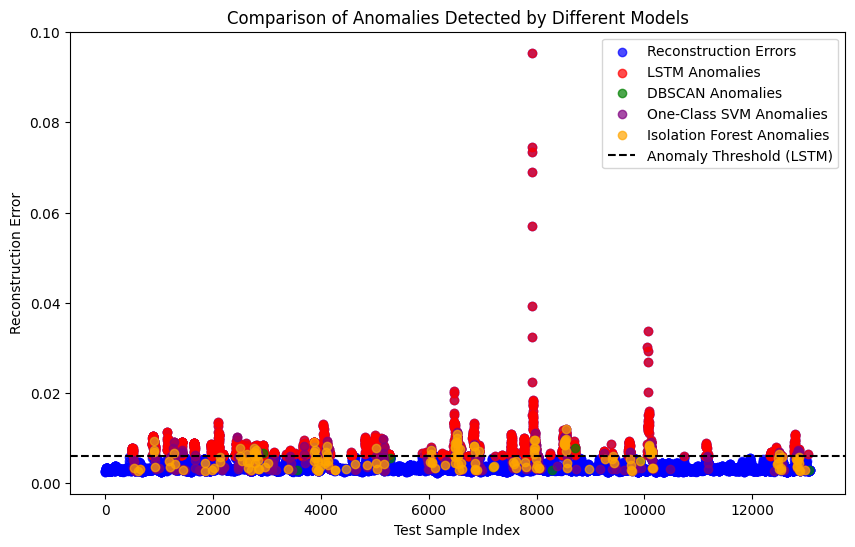

LSTM Model Metrics:
Precision: 1.0
Recall: 0.12229279865309559
F1-Score: 0.21793385612001365
ROC-AUC: Not applicable (only one class present in true labels)
--------------------------------------------------------
DBSCAN Model Metrics:
Precision: 1.0
Recall: 0.0006122292798653096
F1-Score: 0.0012237093690248566
ROC-AUC: None
--------------------------------------------------------
One-Class SVM Model Metrics:
Precision: 1.0
Recall: 0.040560189791076756
F1-Score: 0.07795837317055232
ROC-AUC: None
--------------------------------------------------------
Isolation Forest Model Metrics:
Precision: 1.0
Recall: 0.013009872197137827
F1-Score: 0.025685578303240912
ROC-AUC: None
--------------------------------------------------------
Number of anomalies detected by LSTM: 1598
Number of anomalies detected by DBSCAN: 8
Number of anomalies detected by One-Class SVM: 530
Number of anomalies detected by Isolation Forest: 170
--------------------------------------------------------


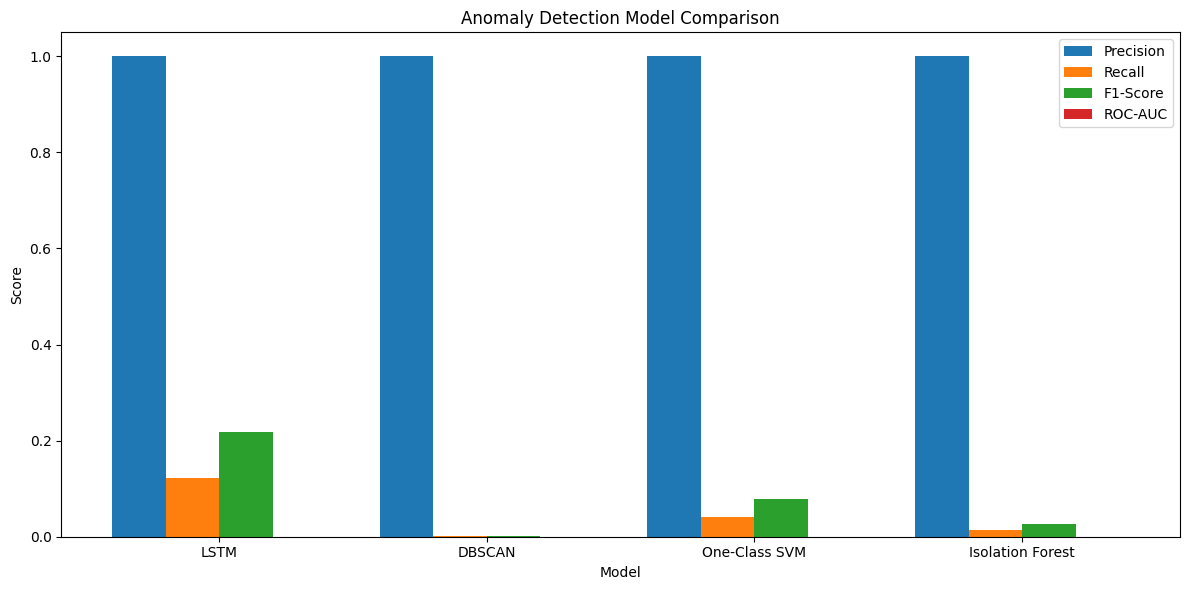

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Load the data
train_data = pd.read_csv('/kaggle/input/anamoly/train_FD001.txt', delim_whitespace=True, header=None)
test_data = pd.read_csv('/kaggle/input/anamoly/test_FD001.txt', delim_whitespace=True, header=None)
rul_data = pd.read_csv('/kaggle/input/anamoly/RUL_FD001.txt', delim_whitespace=True, header=None)

# Assign column names based on dataset description
train_columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]
test_columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]
train_data.columns = train_columns
test_data.columns = test_columns
rul_data.columns = ['RUL']

# Preprocessing the data: Scaling the sensor measurements
sensor_columns = [col for col in train_columns if 'sensor_measurement' in col]
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[sensor_columns])
test_scaled = scaler.transform(test_data[sensor_columns])

# Reshape data for LSTM: We need to format it as [samples, time_steps, features]
time_steps = 30  # Define the time window for LSTM
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps + 1):
        sequences.append(data[i:i+time_steps])
    return np.array(sequences)

train_sequences = create_sequences(train_scaled, time_steps)
test_sequences = create_sequences(test_scaled, time_steps)

# Split data into features and labels (for training)
X_train = train_sequences
X_test = test_sequences

# Build the LSTM Autoencoder model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(time_steps),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

# Train the LSTM Autoencoder
history = model.fit(X_train, X_train, epochs=50, batch_size=64, validation_data=(X_test, X_test))

# Calculate reconstruction errors
train_reconstructions = model.predict(X_train)
test_reconstructions = model.predict(X_test)

train_errors = np.mean(np.square(train_reconstructions - X_train), axis=(1, 2))
test_errors = np.mean(np.square(test_reconstructions - X_test), axis=(1, 2))

# Define anomaly detection threshold
threshold = np.percentile(train_errors, 95)
print(f"Anomaly threshold for LSTM: {threshold}")

# Identify anomalies for LSTM
lstm_anomalies = test_errors > threshold

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_anomalies = dbscan.fit_predict(test_scaled)
dbscan_anomalies = dbscan_anomalies == -1  # DBSCAN labels outliers as -1

# --- One-Class SVM ---
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
ocsvm.fit(train_scaled)
ocsvm_anomalies = ocsvm.predict(test_scaled)
ocsvm_anomalies = ocsvm_anomalies == -1

# --- Isolation Forest ---
iforest = IsolationForest(contamination=0.05, random_state=42)
iforest.fit(train_scaled)
iforest_anomalies = iforest.predict(test_scaled)
iforest_anomalies = iforest_anomalies == -1

# Ensure that all anomaly detection arrays have the same length as test_errors
test_errors_length = len(test_errors)

# Trim or pad the anomaly arrays to match the length of test_errors
lstm_anomalies = lstm_anomalies[:test_errors_length]
dbscan_anomalies = dbscan_anomalies[:test_errors_length]
ocsvm_anomalies = ocsvm_anomalies[:test_errors_length]
iforest_anomalies = iforest_anomalies[:test_errors_length]

# --- Compare Anomaly Detection Results ---
# Create a DataFrame for comparison
anomaly_comparison = pd.DataFrame({
    'Reconstruction_Error': test_errors,
    'LSTM_Anomalies': lstm_anomalies,
    'DBSCAN_Anomalies': dbscan_anomalies,
    'OneClassSVM_Anomalies': ocsvm_anomalies,
    'IsolationForest_Anomalies': iforest_anomalies
})

# Show the first few rows of anomaly comparison
print(anomaly_comparison.head())

# --- Visualization of Anomaly Comparison ---
# 1. Plot reconstruction errors with detected anomalies
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_errors)), test_errors, label='Reconstruction Errors', color='blue', alpha=0.7)
plt.scatter(np.where(lstm_anomalies)[0], test_errors[lstm_anomalies], color='red', label='LSTM Anomalies', alpha=0.7)
plt.scatter(np.where(dbscan_anomalies)[0], test_errors[dbscan_anomalies], color='green', label='DBSCAN Anomalies', alpha=0.7)
plt.scatter(np.where(ocsvm_anomalies)[0], test_errors[ocsvm_anomalies], color='purple', label='One-Class SVM Anomalies', alpha=0.7)
plt.scatter(np.where(iforest_anomalies)[0], test_errors[iforest_anomalies], color='orange', label='Isolation Forest Anomalies', alpha=0.7)
plt.axhline(y=threshold, color='black', linestyle='--', label='Anomaly Threshold (LSTM)')
plt.xlabel('Test Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Comparison of Anomalies Detected by Different Models')
plt.legend()
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def compute_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    # Compute ROC-AUC only if both classes are present in true_labels
    if len(np.unique(true_labels)) > 1:
        roc_auc = roc_auc_score(true_labels, predicted_labels)
    else:
        roc_auc = None  # Indicate that ROC-AUC is not applicable
    
    return precision, recall, f1, roc_auc
    
# --- Metrics Calculation ---
# Use the RUL data to define true anomalies

# Align RUL data with the test set
test_data['RUL'] = test_data['unit_number'].map(lambda x: rul_data.loc[x - 1, 'RUL'])

# Adjust the RUL to match the cycle number for each engine
test_data['RUL'] = test_data.groupby('unit_number')['RUL'].transform(lambda x: x.max() - x + 1)

# Define true anomalies based on the RUL threshold
rul_threshold = 50  # Define a threshold for RUL (you can adjust this)
true_anomalies = test_data['RUL'] < rul_threshold

# --- Metrics Calculation ---
# Align the lengths of true_anomalies and lstm_anomalies
min_length = min(len(true_anomalies), len(lstm_anomalies))
true_anomalies = true_anomalies[:min_length]
lstm_anomalies = lstm_anomalies[:min_length]
dbscan_anomalies = dbscan_anomalies[:min_length]
ocsvm_anomalies = ocsvm_anomalies[:min_length]
iforest_anomalies = iforest_anomalies[:min_length]

# Metrics for LSTM Anomalies
print("LSTM Model Metrics:")
lstm_metrics = compute_metrics(true_anomalies, lstm_anomalies)
print(f"Precision: {lstm_metrics[0]}")
print(f"Recall: {lstm_metrics[1]}")
print(f"F1-Score: {lstm_metrics[2]}")
if lstm_metrics[3] is not None:
    print(f"ROC-AUC: {lstm_metrics[3]}")
else:
    print("ROC-AUC: Not applicable (only one class present in true labels)")


print("--------------------------------------------------------")
# Metrics for DBSCAN
print("DBSCAN Model Metrics:")
dbscan_metrics = compute_metrics(true_anomalies, dbscan_anomalies)
print(f"Precision: {dbscan_metrics[0]}")
print(f"Recall: {dbscan_metrics[1]}")
print(f"F1-Score: {dbscan_metrics[2]}")
print(f"ROC-AUC: {dbscan_metrics[3]}")

print("--------------------------------------------------------")

# Metrics for One-Class SVM
print("One-Class SVM Model Metrics:")
ocsvm_metrics = compute_metrics(true_anomalies, ocsvm_anomalies)
print(f"Precision: {ocsvm_metrics[0]}")
print(f"Recall: {ocsvm_metrics[1]}")
print(f"F1-Score: {ocsvm_metrics[2]}")
print(f"ROC-AUC: {ocsvm_metrics[3]}")

print("--------------------------------------------------------")

# Metrics for Isolation Forest
print("Isolation Forest Model Metrics:")
iforest_metrics = compute_metrics(true_anomalies, iforest_anomalies)
print(f"Precision: {iforest_metrics[0]}")
print(f"Recall: {iforest_metrics[1]}")
print(f"F1-Score: {iforest_metrics[2]}")
print(f"ROC-AUC: {iforest_metrics[3]}")

print("--------------------------------------------------------")


# Count the number of anomalies detected by each model
lstm_anomalies_count = np.sum(lstm_anomalies)
dbscan_anomalies_count = np.sum(dbscan_anomalies)
ocsvm_anomalies_count = np.sum(ocsvm_anomalies)
iforest_anomalies_count = np.sum(iforest_anomalies)

# Print the counts
print(f"Number of anomalies detected by LSTM: {lstm_anomalies_count}")
print(f"Number of anomalies detected by DBSCAN: {dbscan_anomalies_count}")
print(f"Number of anomalies detected by One-Class SVM: {ocsvm_anomalies_count}")
print(f"Number of anomalies detected by Isolation Forest: {iforest_anomalies_count}")

print("--------------------------------------------------------")

# --- Visualization of Anomaly Detection Performance ---
# Visualize precision, recall, F1-Score, and ROC-AUC for each model
# Models and their metrics
models = ['LSTM', 'DBSCAN', 'One-Class SVM', 'Isolation Forest']
precision_scores = [lstm_metrics[0], dbscan_metrics[0], ocsvm_metrics[0], iforest_metrics[0]]
recall_scores = [lstm_metrics[1], dbscan_metrics[1], ocsvm_metrics[1], iforest_metrics[1]]
f1_scores = [lstm_metrics[2], dbscan_metrics[2], ocsvm_metrics[2], iforest_metrics[2]]
roc_auc_scores = [lstm_metrics[3], dbscan_metrics[3], ocsvm_metrics[3], iforest_metrics[3]]

# Replace None in ROC-AUC scores with 0.0 for plotting
roc_auc_scores = [0.0 if score is None else score for score in roc_auc_scores]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Bar width
x = np.arange(len(models))  # x locations for the models

# Bar plots
ax.bar(x - width*1.5, precision_scores, width, label='Precision', align='center')
ax.bar(x - width/2, recall_scores, width, label='Recall', align='center')
ax.bar(x + width/2, f1_scores, width, label='F1-Score', align='center')
ax.bar(x + width*1.5, roc_auc_scores, width, label='ROC-AUC', align='center')

# Labels and Title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Anomaly Detection Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()